In [46]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from camb import model, initialpower

## Pregunta 6

### a)

In [110]:
pars = camb.set_params(H0 = 67)
pars2 = camb.set_params(H0= 67, omnuh2 = 0)

pars.set_matter_power(redshifts=[0.0, 0.8, 1.2], kmax = 2.0)
pars2.set_matter_power(redshifts=[0.0, 0.8, 1.2], kmax = 2.0)

results = camb.get_results(pars)
results2 = camb.get_results(pars2)

kh, z, pk  = results.get_matter_power_spectrum(minkh= 1e-4, maxkh= 1,npoints=200)
kh2, z2, pk2  = results2.get_matter_power_spectrum(minkh= 1e-4, maxkh= 1,npoints=200)



Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


In [111]:
print(results.get_Omega('nu'),results2.get_Omega('nu'))

0.0014365483859376585 0.0


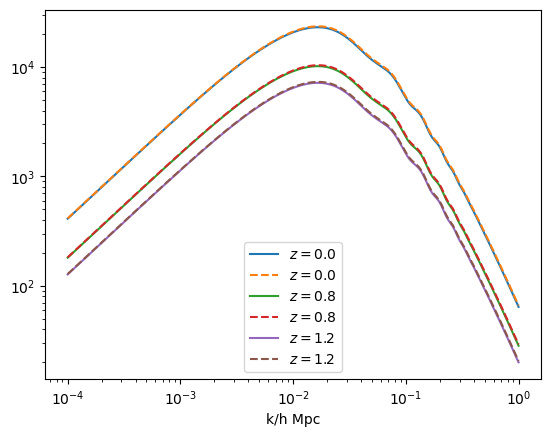

In [112]:
for i, (redshift) in enumerate(z):
    plt.loglog(kh, pk[i,:], label = rf'$z = {redshift}$')
    plt.loglog(kh2, pk2[i,:],'--' ,label = rf'$z = {redshift}$')

plt.xlabel('k/h Mpc')
plt.legend()


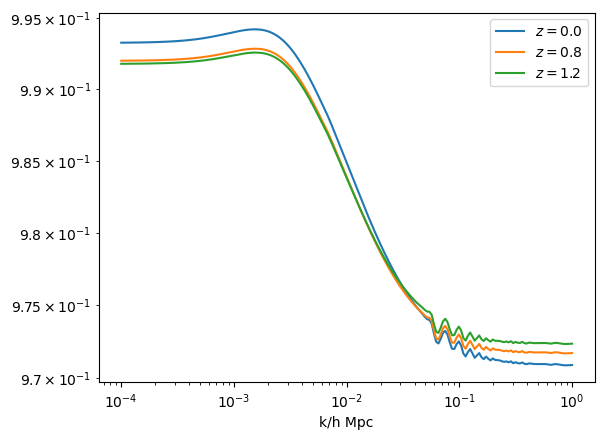

In [113]:
for i, (redshift) in enumerate(z):
    plt.loglog(kh, pk[i,:]/pk2[i,:], label = rf'$z = {redshift}$')

plt.xlabel('k/h Mpc')
plt.legend()


### b)

In [121]:
pars = camb.set_params(H0=67,lmax=3000)

results =camb.get_results(pars)

powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')
powers.keys()

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

(2.0, 3000.0)

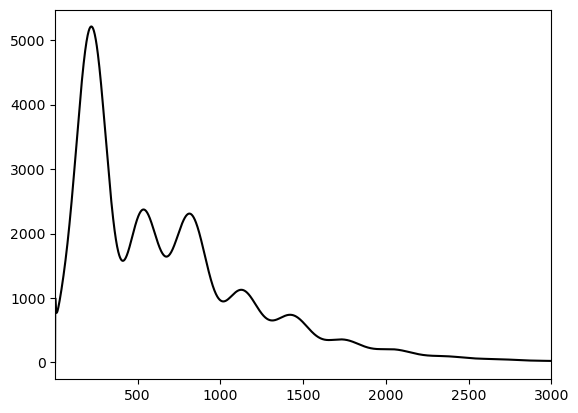

In [122]:
totcl = powers['total']
ls = np.arange(totcl.shape[0])


plt.plot(ls, totcl[:,0], color = 'k')
plt.xlim(2,3000)


Para mostrar como cambia el angular power spectrum con la seleccion de parametros cosmologicos definimos

In [143]:
def power_spectra(ombh2=0.022, omch2=0.122, omk =0):
    pars = camb.set_params(H0=67,lmax=3000, ombh2=ombh2, omch2=omch2,omk  = omk)

    results =camb.get_results(pars)

    powers = results.get_cmb_power_spectra(pars , CMB_unit='muK')

    total = powers['total']

    return total


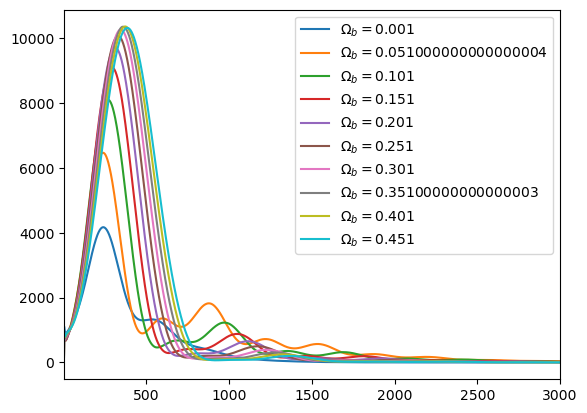

In [141]:
omeb_list = np.arange(0.001,0.5,0.05)
for omeb in omeb_list:
    total = power_spectra(ombh2=omeb)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_b = {omeb}$')

plt.xlim(2,3000)
plt.legend()

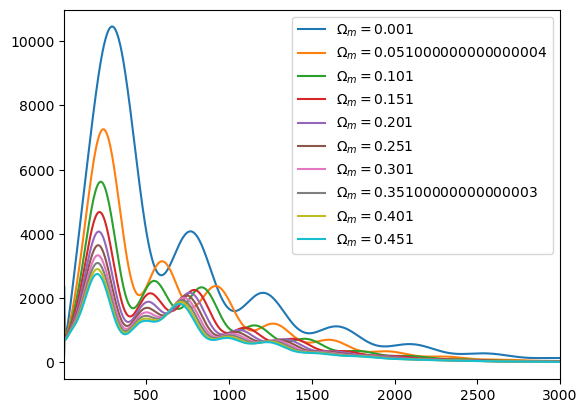

In [144]:
omem_list = np.arange(0.001,0.5,0.05)
for omem in omem_list:
    total = power_spectra(omch2=omem)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_m = {omem}$')

plt.xlim(2,3000)
plt.legend()

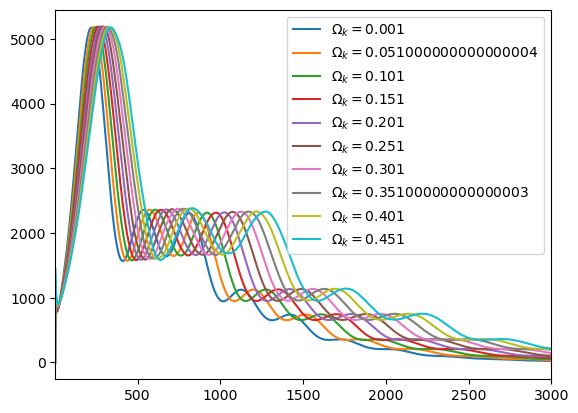

In [145]:
omk_list = np.arange(0.001,0.5,0.05)
for omek in omk_list:
    total = power_spectra(omk=omek)
    ls = np.arange(total.shape[0])
    plt.plot(ls, total[:,0], label = rf'$\Omega_k = {omek}$')

plt.xlim(2,3000)
plt.legend()